Статистическое моделирование на ЭВМ  
Задание №2  
Работу выполнил Королев Е.В., студент М8О-401Б-18 группы  
Преподаватель: Мирошкин В.Л.  
Вариаент №6

# Постановка задачи

Построить формирующий фильтр для случайного процесса $X(t)$, имеющего спектральную плотность $f_X(\lambda)$. Смоделировать три реализации этого процесса на промежутке $[0; 10]$ методом численного интегрирования уравнений формирующего фильтра (шаг интегрирования $h=0.05$, нулевые начальные значения).
$f_X(\lambda) = \dfrac{\lambda^2+2.25}{(4\lambda^2 + 9)^2}$.

# Декомпозируем спектральную плотность:
$f_X(\lambda) = \dfrac{F(\lambda)}{H(\lambda)}, ~~ F(\lambda) = \lambda^2+2.25 = (\lambda + 1.5i)(\lambda - 1.5i), ~~ H(\lambda) = (4\lambda^2 + 9)^2$

# Найдем спектральное разложение:
$F(\lambda)=F_1(i\lambda)F_1(-i\lambda)$ и $H(\lambda)=H_1(i\lambda)H_1(-i\lambda)$.  
$F_1(z) = 1.5 - z ~~ \rightarrow ~~ F_1(i\lambda)F_1(-i\lambda) = (1.5 - i\lambda)(1.5 + i\lambda) = 2.25 + \lambda^2 = F(\lambda)$  
$H_1(z) = 9 - (2z)^2 ~~ \rightarrow ~~ H_1(i\lambda)H_1(-i\lambda) = (9 - (2i\lambda)^2)(9 - (-2i\lambda)^2) = (9 + 4\lambda^2)(9 + 4\lambda^2) = (9 + 4\lambda^2)^2 = H(\lambda)$

# Сформируем передаточную функцию:
$\Phi(z) = \dfrac{F_1(z)}{H_1(z)} = \dfrac{1.5 - z}{9-4z^2} = \dfrac{z/4 - 1.5/4}{z^2 - 2.25} = \dfrac{b_0z + b_1}{z^2 + a_1 z + a_2}, ~~ b_0 = 0.25, b_1 = -0.375 = -1, a_1 = 0, a_2 = -2.25$

# Построим дифференциальное уравнение:
$\ddot y + a_1 \dot y + a_2 y = b_0 \dot x + b_1x$.  
$\ddot y -2.25y = 0.25 \dot x - 0.375x$

# Построим разностную схему:
$y_1 = y$  
$$\begin{cases}
\dot y_1 = y_2 + q_1 x\\
\dot y_2 = 2.25 y_1 + q_2 x
\end{cases}$$  
$y_2 = \dot y_1 - q_1 x$  
$\dot y_2 = \ddot y_1 - \dot q_1 x - q_1 \dot x$  
$2.25 y_1 + q_2 x = \ddot y_1 - \dot q_1 x - q_1 \dot x$  
$\ddot y_1 - 2.25 y_1 = q_1 \dot x + (q_2 + \dot q_1) x$  
$\ddot y -2.25y = 0.25 \dot x - 0.375x$  
Следовательно, $q_1 = 0.25, ~~ q_2 + \dot q_1 = -0.375$  
Откуда $q_1 = 0.25, ~~ q_2 = -0.375$
$$\begin{cases}
\dot y_1 = y_2 + 0.25 x\\
\dot y_2 = 2.25 y_1 - 0.375 x
\end{cases}$$  

$$\begin{cases}
\dfrac{y_1(t+h) - y_1(t)}{h} = y_2(t) + 0.25 x(t)\\
\dfrac{y_2(t+h) - y_2(t)}{h} = 2.25 y_1(t) - 0.375 x(t)
y_1(0) = 0\\
y_2(0) = 0
\end{cases}$$  

$$\begin{cases}
y_1(t+h) = y_1(t) + y_2(t) h + 0.25 h x(t)\\
y_2(t+h) = y_2(t) + 2.25 h y_1(t) - 0.375 h x(t)\\
y_1(0) = 0\\
y_2(0) = 0
\end{cases}$$  

$x(t) = \sqrt{2\pi}\varepsilon_X$ -- белый шум, $\varepsilon_X \sim N(0,1)$

$$\begin{cases}
y_1(t+h) = y_1(t) + y_2(t) h + 0.25 h \sqrt{2\pi}\varepsilon_X\\
y_2(t+h) = y_2(t) + 2.25 h y_1(t) - 0.375 h \sqrt{2\pi}\varepsilon_X\\
y_1(0) = 0\\
y_2(0) = 0
\end{cases}$$  

# Численный эксперимент

In [24]:
import numpy as np
import matplotlib.pyplot as plt
def gen_rand_proc(a=0, b=10, h=0.05):
    y_1, y_2 = [0], [0]
    X = [a]
    for t in np.arange(a + h, b+h/2, h):
        X.append(t)
        x = np.sqrt(2*np.pi)*np.random.normal(0,1)
        y_1.append(y_1[-1] + y_2[-1]*h      + 0.25*h*x)
        y_2.append(y_2[-1] + 2.25*y_1[-1]*h - 0.375*h*x)
    return X, y_1

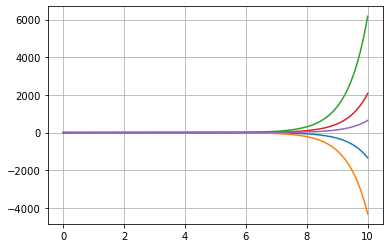

In [29]:
n = 5
for _ in range(n):
    x, y = gen_rand_proc()
    plt.plot(x, y)
plt.grid()
plt.show()

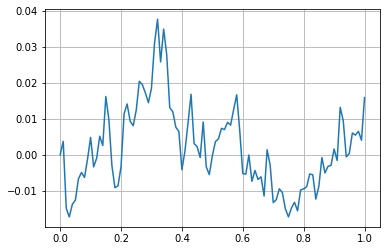

In [43]:
n = 1
for _ in range(n):
    x, y = gen_rand_proc(a=0, b=1, h=0.01)
    plt.plot(x, y)
plt.grid()
plt.show()

# Выводы
Был построен формирующий фильтр для случайного процесса, заданного спектральной плотностью $f_X(\lambda)$. Было проведено моделирование случайного процесса на промежутках $[0;10]$ и $[0;1]$. На большом маштабе СП ведет себя экспоненциально, хотя на меньшем масштабе это не сильно заметно.